<a href="https://colab.research.google.com/github/feicccccccc/colab_sandbox/blob/master/MNIST_keras_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A testing to use colab to perform MNIST training using Keras

## First step: Import library including


1.   Keras (deeplearning framework)
2.   matplotlib (to plot graph)
3.   numpy



In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

### Get the MNIST data set from keras default dataloader

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Show part of the data set in term of pixel map and there output y

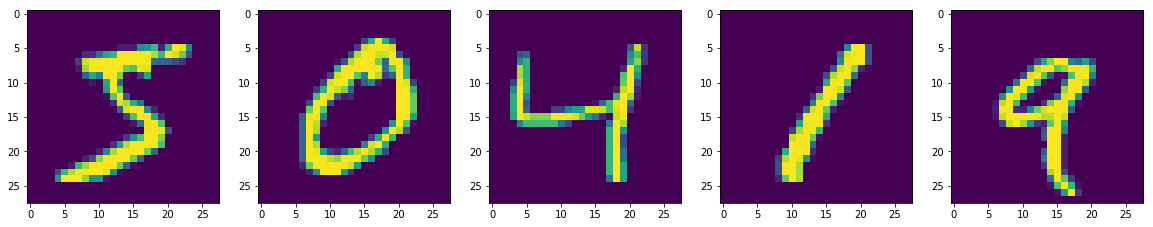

In [88]:
images=[x_train[0,:],x_train[1,:],x_train[2,:],x_train[3,:],x_train[4,:]]

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [89]:
print("First label  = ", y_train[0])
print("Second Label = ", y_train[1])
print("Third label  = ", y_train[2])
print("Forth label  = ", y_train[3])
print("Fifth label  = ", y_train[4])

First label  =  5
Second Label =  0
Third label  =  4
Forth label  =  1
Fifth label  =  9


### Data pre processing
### Normalise the raw data

In [90]:
print("Original data at x some pixel = ", x_train[0,7])

Original data at x some pixel =  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0]


In [0]:
x_train_reshaped = x_train / 255
x_test_reshaped = x_test / 255

x_train_reshaped = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [92]:
print("New data at x some pixel = ", x_train_reshaped[0,7])

New data at x some pixel =  [[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [ 49]
 [238]
 [253]
 [253]
 [253]
 [253]
 [253]
 [253]
 [253]
 [253]
 [251]
 [ 93]
 [ 82]
 [ 82]
 [ 56]
 [ 39]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


### Transform the output to one-hot data encoding

In [0]:
from keras.utils import to_categorical

y_train_reshaped = to_categorical(y_train, 10)
y_test_reshaped = to_categorical(y_test, 10)

In [94]:
print("one hot encoding for the first training data = ", y_train_reshaped[0])

one hot encoding for the first training data =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Create the model using Keras API

### Get the input and output dimension from the input data

In [95]:
print("shape of the training sample = ", x_train_reshaped.shape)
print("shape of the output lable = ", y_train_reshaped.shape)

m , n_w, n_h, n_c = x_train_reshaped.shape
_ , n_y = y_train_reshaped.shape


shape of the training sample =  (60000, 28, 28, 1)
shape of the output lable =  (60000, 10)


### Create model (computational graph)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(n_w,n_h,n_c)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

## Compile the model and define the loss fuunction and gradient descent method.

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

### Summary of the model

In [98]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
__________

### computational graph of the model

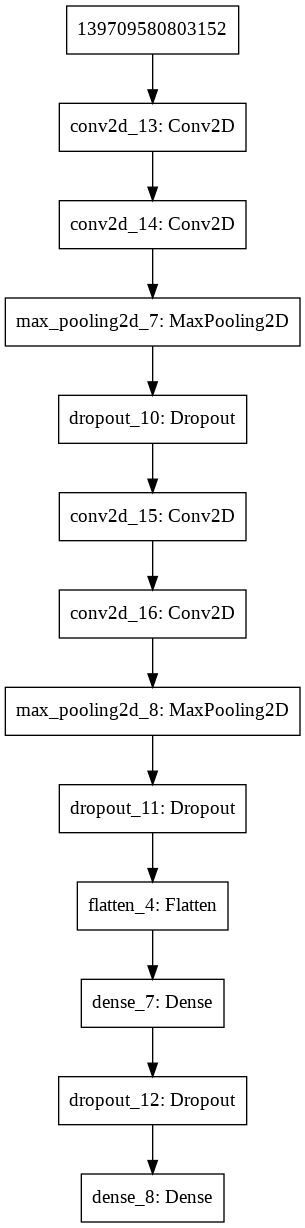

In [99]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png')
Image(filename='model.png') 

# Train the model

In [102]:
model.fit(x_train_reshaped, y_train_reshaped, epochs=10, batch_size=512)

Epoch 1/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0195 - acc: 0.9939
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0192 - acc: 0.9941
Epoch 3/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0162 - acc: 0.9948
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0177 - acc: 0.9946
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0178 - acc: 0.9947
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0165 - acc: 0.9950
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0152 - acc: 0.9950
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0154 - acc: 0.9948
Epoch 9/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0151 - acc: 0.9949
Epoch 10/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0150 - acc: 0.9950

## Test model performance

In [103]:
score = model.evaluate(x_test_reshaped, y_test_reshaped, batch_size=128)
print("loss, mertric = ", score)

10000/10000 [==============================] - 0s 42us/step
loss, mertric =  [0.022538089055793534, 0.9945]


## input Example:

Model output =  [[8.7515449e-16 1.8292554e-09 9.1277905e-12 2.2903231e-11 5.9534766e-04
  1.9037290e-09 3.8543664e-18 1.1628432e-05 1.9886825e-08 9.9939299e-01]]
The input character =  [9]


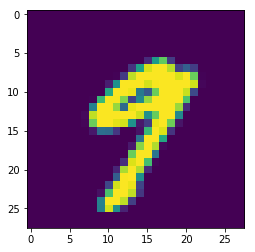

In [106]:
sample_idx = 20

image= x_test[sample_idx,:]

plt.imshow(image)

foo = np.expand_dims(x_test_reshaped[sample_idx,:], axis=0)

predict = model.predict(foo)

print("Model output = ", predict)

result = np.where(predict == np.amax(predict))

print("The input character = ", result[1])